🔍- Overview: You are working as a Junior Data Analyst at a company that tracks sales and customer information. Your manager has shared a dataset containing sales transactions, and you’ve been assigned to analyze it to uncover trends, patterns, and generate summary reports.

Your role is to clean the dataset, analyze key business metrics, generate visualizations, and export reports — using only Pandas, NumPy, Matplotlib, and Seaborn. The goal is to simulate a real-world reporting workflow based on company data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

**Step 1: Load & Explore Sales Data**

In [2]:
data = pd.read_csv('Sales Dataset.csv')
print(data.head(10))

  Order ID  Amount  Profit  Quantity         Category      Sub-Category  \
0  B-26776    9726    1275         5      Electronics  Electronic Games   
1  B-26776    9726    1275         5      Electronics  Electronic Games   
2  B-26776    9726    1275         5      Electronics  Electronic Games   
3  B-26776    4975    1330        14      Electronics          Printers   
4  B-26776    4975    1330        14      Electronics          Printers   
5  B-26776    4975    1330        14      Electronics          Printers   
6  B-26942    1525     185        12  Office Supplies              Pens   
7  B-26942    1525     185        12  Office Supplies              Pens   
8  B-26640     883     117        10      Electronics           Laptops   
9  B-26640    8127    3551        16        Furniture            Tables   

   PaymentMode  Order Date    CustomerName       State         City Year-Month  
0          UPI  2023-06-27   David Padilla     Florida        Miami    2023-06  
1          U

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [4]:
print("Shape:", data.shape)
print("\nSummary Statistics:")
print(data.describe())

Shape: (1194, 12)

Summary Statistics:
            Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000


**Step 2: Clean and Preprocess the Data**

In [5]:
print('\nMissing Data\n')
print(data.isnull().sum())


Missing Data

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64


In [6]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1194 non-null   object        
 1   Amount        1194 non-null   int64         
 2   Profit        1194 non-null   int64         
 3   Quantity      1194 non-null   int64         
 4   Category      1194 non-null   object        
 5   Sub-Category  1194 non-null   object        
 6   PaymentMode   1194 non-null   object        
 7   Order Date    1194 non-null   datetime64[ns]
 8   CustomerName  1194 non-null   object        
 9   State         1194 non-null   object        
 10  City          1194 non-null   object        
 11  Year-Month    1194 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 112.1+ KB
None


In [7]:
data = data.drop_duplicates()

**Step 3: Generate Operational Insights**

In [8]:
#Most frequently used payment methods
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')

print(" 💳 Most frequently used payment methods:")
payment_method = """
SELECT PaymentMode, COUNT(*) AS usage_count
FROM sales
GROUP BY PaymentMode
ORDER BY usage_count DESC;
"""
payment_method_result = pd.read_sql_query(payment_method, conn)
print(payment_method_result)

print("\n 📊 Top 10 cities with the highest number of orders:")

#Top 10 cities with the highest number of orders
city_order = """
SELECT City, COUNT(*) AS order_count
FROM sales
GROUP BY City
ORDER BY order_count DESC
LIMIT 10;
"""
city_order_result = pd.read_sql_query(city_order, conn)
print(city_order_result)

conn.close()

# Monthly order volume
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')

query = '''
SELECT "Year-Month", COUNT(*) as order_volume
FROM sales
GROUP BY "Year-Month"
ORDER BY "Year-Month"
'''
monthly_orders = pd.read_sql_query(query, conn)

print(" 📋 Monthly Order Volume based on a formatted Year-Month column ")
print(monthly_orders)

 💳 Most frequently used payment methods:
   PaymentMode  usage_count
0   Debit Card          260
1  Credit Card          258
2          UPI          252
3          EMI          218
4          COD          206

 📊 Top 10 cities with the highest number of orders:
            City  order_count
0        Buffalo           90
1  San Francisco           84
2        Orlando           77
3      Rochester           74
4      San Diego           73
5         Dallas           72
6      Cleveland           70
7    Springfield           68
8          Miami           66
9         Austin           65
 📋 Monthly Order Volume based on a formatted Year-Month column 
   Year-Month  order_volume
0     2020-03             4
1     2020-04            27
2     2020-05            22
3     2020-06            10
4     2020-07             9
..        ...           ...
56    2024-11            13
57    2024-12            25
58    2025-01            16
59    2025-02            18
60    2025-03            10

[61 row

**Step 4 - Product Analysis**

In [9]:
# Overpriced product
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')
print(" 📉 Expensive but Low-Sales Products :")
expensive_low_sales_query = """
SELECT "Sub-Category",
       ROUND(AVG(Amount / Quantity), 2) AS avg_price,   -- average unit price
       SUM(Quantity) AS total_quantity
FROM sales
GROUP BY "Sub-Category"
ORDER BY avg_price DESC, total_quantity ASC
LIMIT 10;
"""
expensive_low_sales_result = pd.read_sql_query(expensive_low_sales_query, conn)
print(expensive_low_sales_result)

# Most popular categories by quantity sold
print("\n 📈 Most Popular Categories by total quantity sold :")
popular_categories_query = """
SELECT Category,
       SUM(Quantity) AS total_quantity
FROM sales
GROUP BY Category
ORDER BY total_quantity DESC;
"""
popular_categories_result = pd.read_sql_query(popular_categories_query, conn)
print(popular_categories_result)

conn.close()

 📉 Expensive but Low-Sales Products :
       Sub-Category  avg_price  total_quantity
0           Binders    1203.06             688
1            Phones    1059.06             980
2            Chairs    1038.61             875
3           Markers     989.38            1173
4             Sofas     959.01            1233
5             Paper     946.10             981
6              Pens     890.72            1204
7           Laptops     806.73             934
8  Electronic Games     792.07            1220
9            Tables     778.86            1303

 📈 Most Popular Categories by total quantity sold :
          Category  total_quantity
0        Furniture            4441
1      Electronics            4258
2  Office Supplies            4046


**Step 5: Data Visualization**

In [10]:
# Top 10 Sub-Categories by Revenue
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')
print(" 🏆 Top 10 Products Sub-Categories by Revenue:")
top_products_query = """
SELECT "Sub-Category",
       SUM(Amount) AS total_revenue
FROM sales
GROUP BY "Sub-Category"
ORDER BY total_revenue DESC
LIMIT 10;
"""
top_products_result = pd.read_sql_query(top_products_query, conn)
print(top_products_result)

conn.close()

 🏆 Top 10 Products Sub-Categories by Revenue:
       Sub-Category  total_revenue
0           Markers         627875
1            Tables         625177
2             Sofas         568367
3          Printers         566359
4  Electronic Games         565092
5              Pens         552269
6             Paper         524755
7            Phones         503055
8            Chairs         431964
9           Laptops         419950


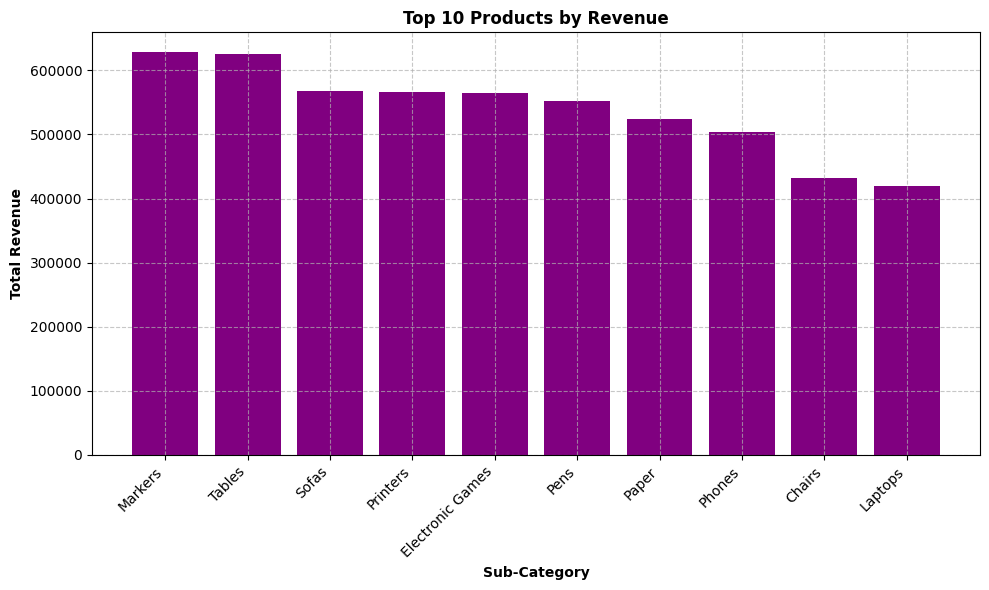

In [11]:
# Vertical Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_products_result["Sub-Category"], top_products_result["total_revenue"], color="purple")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Products by Revenue",fontweight='bold' )
plt.xlabel("Sub-Category",fontweight='bold')
plt.ylabel("Total Revenue",fontweight='bold')
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#Monthly order trend
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')
print(" 📈 Monthly Order Trend:")
monthly_order_query = """
SELECT "Year-Month", COUNT(*) AS order_count
FROM sales
GROUP BY "Year-Month"
ORDER BY "Year-Month" ASC;
"""
monthly_order_result = pd.read_sql_query(monthly_order_query, conn)
print(monthly_order_result)

conn.close()

 📈 Monthly Order Trend:
   Year-Month  order_count
0     2020-03            4
1     2020-04           27
2     2020-05           22
3     2020-06           10
4     2020-07            9
..        ...          ...
56    2024-11           13
57    2024-12           25
58    2025-01           16
59    2025-02           18
60    2025-03           10

[61 rows x 2 columns]


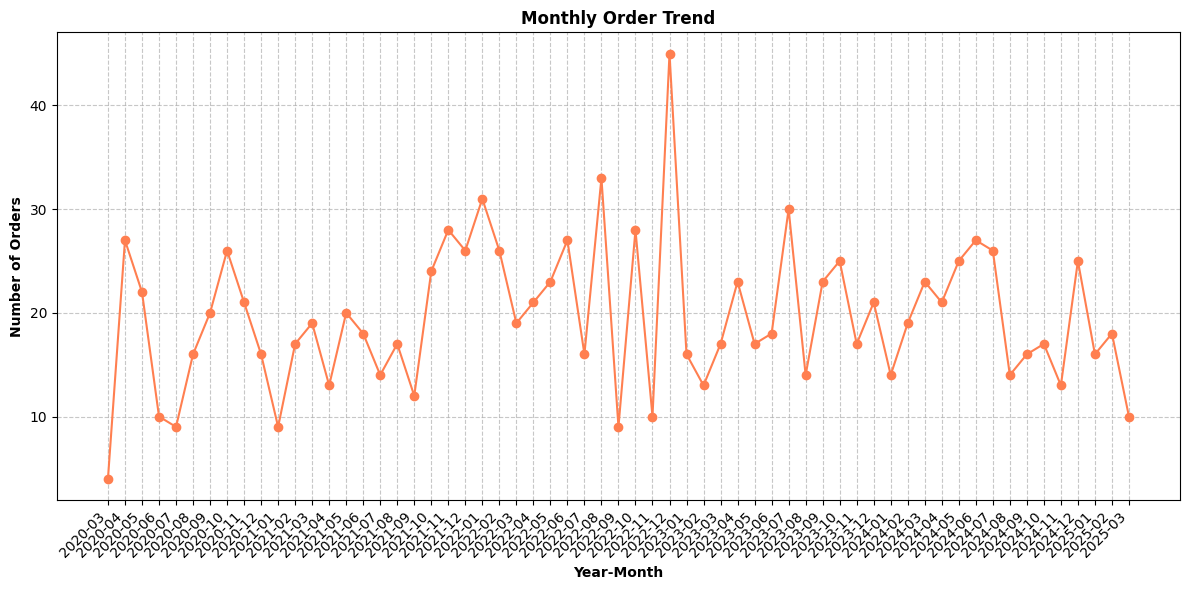

In [14]:
#Line Chart
plt.figure(figsize=(12,6))
plt.plot(monthly_order_result["Year-Month"], monthly_order_result["order_count"], marker="o", color="coral")
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Order Trend",fontweight='bold')
plt.xlabel("Year-Month",fontweight='bold')
plt.ylabel("Number of Orders",fontweight='bold')
plt.grid(True, linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
#Top 10 states by total profit
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')
print("Top 10 States by Total Profit:")
top_states_query = """
SELECT State, SUM(Profit) AS total_profit
FROM sales
GROUP BY State
ORDER BY total_profit DESC
LIMIT 10;
"""
top_states_result = pd.read_sql_query(top_states_query, conn)
print(top_states_result)

conn.close()

Top 10 States by Total Profit:
        State  total_profit
0     Florida        308706
1    New York        308506
2  California        278814
3       Texas        257780
4    Illinois        240372
5        Ohio        216519


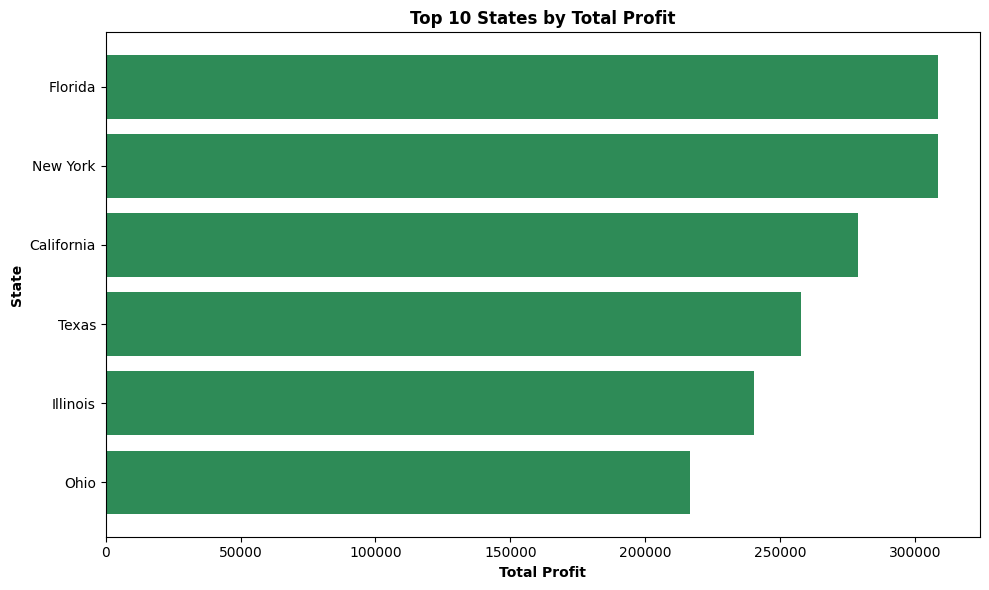

In [16]:
# horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(top_states_result["State"], top_states_result["total_profit"], color='seagreen')
plt.gca().invert_yaxis()
plt.title("Top 10 States by Total Profit",fontweight='bold')
plt.xlabel("Total Profit",fontweight='bold')
plt.ylabel("State",fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Total profit by payment mode
conn = sqlite3.connect(':memory:')
data.to_sql('sales', conn, index=False, if_exists='replace')
print("Total Profit by Payment Mode:")
profit_payment_query = """
SELECT PaymentMode, SUM(Profit) AS total_profit
FROM sales
GROUP BY PaymentMode
ORDER BY total_profit DESC;
"""
profit_payment_result = pd.read_sql_query(profit_payment_query, conn)
print(profit_payment_result)

conn.close()

Total Profit by Payment Mode:
   PaymentMode  total_profit
0   Debit Card        375721
1  Credit Card        349392
2          UPI        333889
3          EMI        295951
4          COD        255744


/tmp/ipython-input-589343352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PaymentMode", y="total_profit", data=profit_payment_result, palette="viridis")


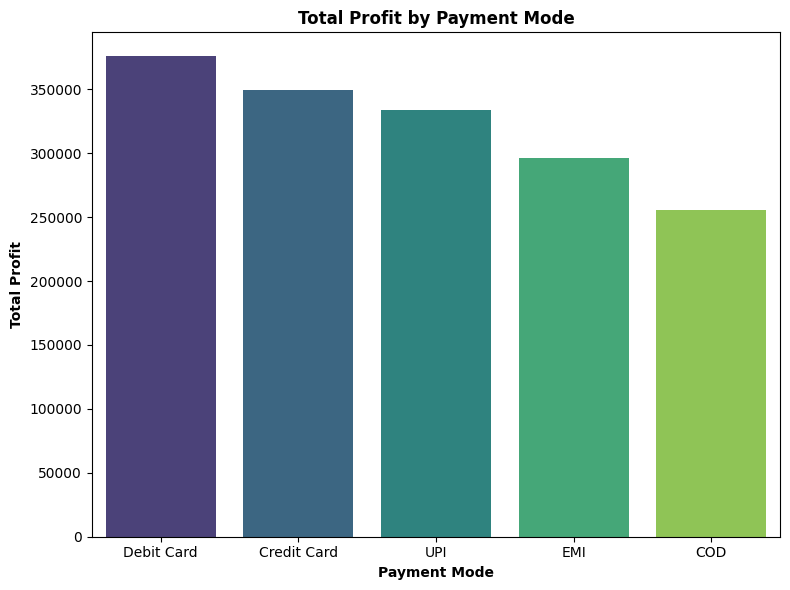

In [18]:
#Seaborn bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="PaymentMode", y="total_profit", data=profit_payment_result, palette="viridis")
plt.title("Total Profit by Payment Mode",fontweight='bold')
plt.xlabel("Payment Mode",fontweight='bold')
plt.ylabel("Total Profit",fontweight='bold')
plt.tight_layout()
plt.show()

**Step 6: Export Business Reports**

In [19]:
# Top 10 Products by Revenue
top_products = (
    data.groupby(['Category', 'Sub-Category'], dropna=False)['Amount']
    .sum()
    .reset_index()
    .sort_values('Amount', ascending=False)
    .head(10)
    .reset_index(drop=True)
)
top_products.columns = ["Top Product Category", "Sub-Category", "Total Revenue"]

# Monthly Order Volume
monthly_orders = (
    data.groupby('Year-Month', dropna=False)
    .size()
    .reset_index(name='Number of Orders')
    .sort_values('Year-Month')
)

monthly_orders_10 = monthly_orders.reset_index(drop=True).head(10)
monthly_orders_10.columns = ["Month", "Number of Orders"]

# Combine data and export
combined_data = pd.concat([top_products.reset_index(drop=True), monthly_orders_10.reset_index(drop=True)], axis=1)
combined_data.to_csv('top_products_and_monthly_orders.csv', index=False)
print("Saved combined report to: top_products_and_monthly_orders.csv")

Saved combined report to: top_products_and_monthly_orders.csv


In [20]:
print("\nCombined report:\n")
combined_data


Combined report:



,Top Product Category,Sub-Category,Total Revenue,Month,Number of Orders
0,Office Supplies,Markers,627875,2020-03,4
1,Furniture,Tables,625177,2020-04,27
2,Furniture,Sofas,568367,2020-05,22
3,Electronics,Printers,566359,2020-06,10
4,Electronics,Electronic Games,565092,2020-07,9
5,Office Supplies,Pens,552269,2020-08,16
6,Office Supplies,Paper,524755,2020-09,20
7,Electronics,Phones,503055,2020-10,26
8,Furniture,Chairs,431964,2020-11,21
9,Electronics,Laptops,419950,2020-12,16
